<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#JSON-examples-and-exercise" data-toc-modified-id="JSON-examples-and-exercise-1">JSON examples and exercise</a></span><ul class="toc-item"><li><span><a href="#JSON-example,-with-string" data-toc-modified-id="JSON-example,-with-string-1.1">JSON example, with string</a></span></li><li><span><a href="#JSON-example,-with-file" data-toc-modified-id="JSON-example,-with-file-1.2">JSON example, with file</a></span></li><li><span><a href="#JSON-exercise" data-toc-modified-id="JSON-exercise-1.3">JSON exercise</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Reading-and-loading-Data" data-toc-modified-id="Reading-and-loading-Data-1.3.0.1">Reading and loading Data</a></span></li></ul></li></ul></li><li><span><a href="#QUESTION-1" data-toc-modified-id="QUESTION-1-1.4">QUESTION 1</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Find-the-10-countries-with-most-projects" data-toc-modified-id="Find-the-10-countries-with-most-projects-1.4.0.0.1">Find the 10 countries with most projects</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#QUESTION-2" data-toc-modified-id="QUESTION-2-1.5">QUESTION 2</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Find-the-top-10-major-project-themes-(using-column-'mjtheme_namecode')" data-toc-modified-id="Find-the-top-10-major-project-themes-(using-column-'mjtheme_namecode')-1.5.0.1">Find the top 10 major project themes (using column 'mjtheme_namecode')</a></span></li></ul></li></ul></li><li><span><a href="#QUESTION-3" data-toc-modified-id="QUESTION-3-1.6">QUESTION 3</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#In-2.-above-you-will-notice-that-some-entries-have-only-the-code-and-the-name-is-missing.-Create-a-dataframe-with-the-missing-names-filled-in." data-toc-modified-id="In-2.-above-you-will-notice-that-some-entries-have-only-the-code-and-the-name-is-missing.-Create-a-dataframe-with-the-missing-names-filled-in.-1.6.0.1">In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.</a></span></li></ul></li></ul></li></ul></li></ul></div>

# JSON examples and exercise
   
***
- get familiar with packages for dealing with JSON
- study examples with JSON strings and files
- work on exercise to be completed and submitted

***
- reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
- data source: http://jsonstudio.com/resources/


In [1]:
import pandas as pd
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import numpy as np

## JSON example, with string
- demonstrates creation of normalized dataframes (tables) from nested json string
- source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization


In [2]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]


In [3]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [4]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


***
## JSON example, with file
- demonstrates reading in a json file as a string and as a table
- uses small sample file containing data about projects funded by the World Bank
- data source: http://jsonstudio.com/resources/

In [5]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [6]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


## JSON exercise
Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

#### Reading and loading Data

In [9]:
df=pd.read_json('data/world_bank_projects.json')
with open ('data/world_bank_projects.json') as d:
    data=json.load(d)

In [11]:
df.head()

,sector,supplementprojectflg,projectfinancialtype,prodline,mjtheme,idacommamt,impagency,project_name,mjthemecode,closingdate,...,majorsector_percent,board_approval_month,theme_namecode,countryname,url,source,projectstatusdisplay,ibrdcommamt,sector_namecode,_id
0,"[{'Name': 'Primary education'}, {'Name': 'Seco...",N,IDA,PE,[Human development],130000000,MINISTRY OF EDUCATION,Ethiopia General Education Quality Improvement...,"8,11",2018-07-07T00:00:00Z,...,"[{'Percent': 46, 'Name': 'Education'}, {'Perce...",November,"[{'code': '65', 'name': 'Education for all'}]",Federal Democratic Republic of Ethiopia,http://www.worldbank.org/projects/P129828/ethi...,IBRD,Active,0,"[{'code': 'EP', 'name': 'Primary education'}, ...",{'$oid': '52b213b38594d8a2be17c780'}
1,[{'Name': 'Public administration- Other social...,N,OTHER,RE,"[Economic management, Social protection and ri...",0,MINISTRY OF FINANCE,TN: DTF Social Protection Reforms Support,"1,6",NaN,...,"[{'Percent': 70, 'Name': 'Public Administratio...",November,"[{'code': '24', 'name': 'Other economic manage...",Republic of Tunisia,http://www.worldbank.org/projects/P144674?lang=en,IBRD,Active,0,"[{'code': 'BS', 'name': 'Public administration...",{'$oid': '52b213b38594d8a2be17c781'}
2,[{'Name': 'Rural and Inter-Urban Roads and Hig...,Y,IDA,PE,"[Trade and integration, Public sector governan...",6060000,MINISTRY OF TRANSPORT AND COMMUNICATIONS,Tuvalu Aviation Investment Project - Additiona...,"5,2,11,6",NaN,...,"[{'Percent': 100, 'Name': 'Transportation'}]",November,"[{'code': '47', 'name': 'Regional integration'...",Tuvalu,http://www.worldbank.org/projects/P145310?lang=en,IBRD,Active,0,"[{'code': 'TI', 'name': 'Rural and Inter-Urban...",{'$oid': '52b213b38594d8a2be17c782'}
3,[{'Name': 'Other social services'}],N,OTHER,RE,"[Social dev/gender/inclusion, Social dev/gende...",0,LABOR INTENSIVE PUBLIC WORKS PROJECT PMU,Gov't and Civil Society Organization Partnership,"7,7",NaN,...,"[{'Percent': 100, 'Name': 'Health and other so...",October,"[{'code': '57', 'name': 'Participation and civ...",Republic of Yemen,http://www.worldbank.org/projects/P144665?lang=en,IBRD,Active,0,"[{'code': 'JB', 'name': 'Other social services'}]",{'$oid': '52b213b38594d8a2be17c783'}
4,[{'Name': 'General industry and trade sector'}...,N,IDA,PE,"[Trade and integration, Financial and private ...",13100000,MINISTRY OF TRADE AND INDUSTRY,Second Private Sector Competitiveness and Econ...,"5,4",2019-04-30T00:00:00Z,...,"[{'Percent': 50, 'Name': 'Industry and trade'}...",October,"[{'code': '45', 'name': 'Export development an...",Kingdom of Lesotho,http://www.worldbank.org/projects/P144933/seco...,IBRD,Active,0,"[{'code': 'YZ', 'name': 'General industry and ...",{'$oid': '52b213b38594d8a2be17c784'}


## QUESTION 1
##### Find the 10 countries with most projects

In [389]:
#first way
df_c=pd.DataFrame(df['countryshortname'].value_counts().sort_values(ascending=False)[:11]) 
#Because Afrika is a continent
df_c.index.name='countryshortname'
df_c.columns=["Project_count"]
print(df_c)

                    Project_count
countryshortname                 
Indonesia                      19
China                          19
Vietnam                        17
India                          16
Yemen, Republic of             13
Bangladesh                     12
Nepal                          12
Morocco                        12
Mozambique                     11
Africa                         11
Brazil                          9


<function matplotlib.pyplot.show(*args, **kw)>

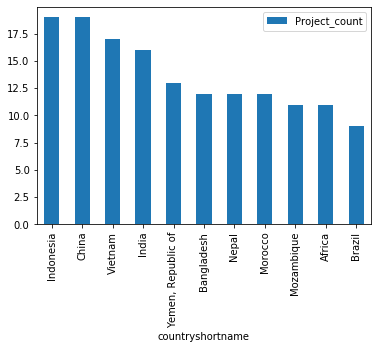

In [414]:
df_c.plot(kind='bar')
plt.show

In [391]:
#Find the 10 countries with most projects
#Second way
df.set_index('countryshortname',inplace=True)
df_p=df[['project_name']].groupby('countryshortname').count().sort_values('project_name',ascending=False)[:11]
df_p.index.name='Country'
df_p.columns=['Project_count']
print(df_p)

                    Project_count
Country                          
China                          19
Indonesia                      19
Vietnam                        17
India                          16
Yemen, Republic of             13
Nepal                          12
Bangladesh                     12
Morocco                        12
Mozambique                     11
Africa                         11
Pakistan                        9


<function matplotlib.pyplot.show(*args, **kw)>

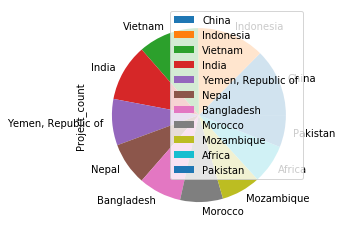

In [431]:
df_p.plot(kind='pie',x='countryshortname',y='Project_count')
plt.show

In [353]:
#In 2. above you will notice that some entries have only the code and the name is missing.
#Create a dataframe with the missing names filled in.'''
#first way
df2=json_normalize(data,'mjtheme_namecode')
df2.head(), df2.tail(),type(df2)

(  code                                   name
 0    8                      Human development
 1   11                                       
 2    1                    Economic management
 3    6  Social protection and risk management
 4    5                  Trade and integration,
      code                                      name
 1494   10                         Rural development
 1495    9                         Urban development
 1496    8                         Human development
 1497    5                     Trade and integration
 1498    4  Financial and private sector development,
 pandas.core.frame.DataFrame)

In [354]:
namecode_dict=dict(zip(df2['code'],df2['name']))
namecode_dict['1']='Economic management'
namecode_dict['6']='Social protection and risk management'
namecode_dict

{'8': 'Human development',
 '11': 'Environment and natural resources management',
 '1': 'Economic management',
 '6': 'Social protection and risk management',
 '5': 'Trade and integration',
 '2': 'Public sector governance',
 '7': 'Social dev/gender/inclusion',
 '4': 'Financial and private sector development',
 '10': 'Rural development',
 '9': 'Urban development',
 '3': 'Rule of law'}

In [355]:
df2_final=df2['name']=df2['code'].map(namecode_dict)


## QUESTION 2
#### Find the top 10 major project themes (using column 'mjtheme_namecode')

In [406]:
#first way
top10_pt=df2.groupby('name').count().sort_values('code',ascending=False)[:10]
top10_pt

,code
name,
Environment and natural resources management,250
Rural development,216
Human development,210
Public sector governance,199
Social protection and risk management,168
Financial and private sector development,146
Social dev/gender/inclusion,130
Trade and integration,77
Urban development,50


<function matplotlib.pyplot.show(*args, **kw)>

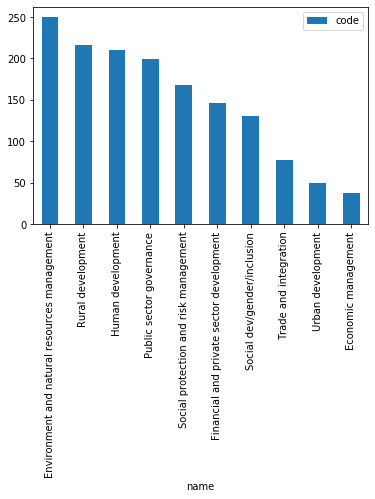

In [422]:
top10_pt.plot(kind='bar')
plt.show

## QUESTION 3
#### In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [423]:
#second way
df2_top=pd.DataFrame(df2['name'].value_counts().sort_values(ascending=False)[:10])
df2_top.columns=['code']
df2_top.index.name='name'
df2_top

,code
name,
Environment and natural resources management,250
Rural development,216
Human development,210
Public sector governance,199
Social protection and risk management,168
Financial and private sector development,146
Social dev/gender/inclusion,130
Trade and integration,77
Urban development,50


<function matplotlib.pyplot.show(*args, **kw)>

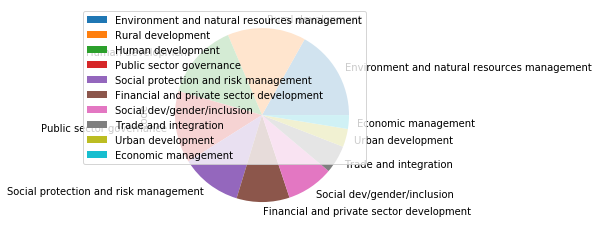

In [427]:
df2_top.plot(kind='pie',x='name',y='code')
plt.show